In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np 
import os
import cv2
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Activation, Dense, Flatten
from keras.models import Model, Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import array_to_img

Using TensorFlow backend.


In [3]:
DATADIR = "C:\\Datasets\\PetImages"
CATEGORIES = ["Cat","Dog"]

In [4]:
training_data = []
IMG_SIZE = 28

In [5]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to cats or dogs directory
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass

In [6]:
len(training_data)

401

In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data:
    print(sample[1])

1
0
0
0
1
1
0
0
0
0
1
0
0
1
1
0
1
0
1
0
1
0
1
0
0
1
1
0
1
1
0
0
1
1
1
0
0
0
1
0
1
1
1
0
0
1
0
1
1
0
0
0
0
0
1
1
1
0
0
1
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
0
1
1
0
0
1
0
0
1
1
0
1
0
0
1
1
1
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
1
1
1
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
1
1
1
0
1
1
1
1
0
1
1
0
0
0
0
1
0
1
0
1
1
0
1
0
1
1
0
1
0
0
1
0
1
0
0
1
1
0
0
1
1
0
0
0
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
0
0
0
0
1
0
0
1
1
0
0
0
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
0
1
0
0
1
0
1
1
0
1
1
1
1
0
0
1
1
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
1
1
0
1
1
0
1
1
0
0
1
0
1
1
1
0
0
0
0
0
1
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
0
1
0
0
1
0
0
1
1
1
0
1
0
1
1
1
0
1
1
1
0
0
0
0
1
1
0
1
1
1
0
0
1
0
0
1
0
1
0
0
1
1
0
0
1
0
0
1
1
0
0
1


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [11]:
X = np.float32(X)

In [12]:
X.shape

(401, 28, 28)

In [13]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [14]:
X.shape

(401, 28, 28, 1)

In [15]:
X = X/255

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
X_train.shape

(320, 28, 28, 1)

In [18]:
X_test.shape

(81, 28, 28, 1)

# Creating Our Model

In [28]:
model = Sequential()

# Encoding Part 

In [29]:
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [30]:
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))

# Decoding Part

In [32]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))

In [33]:
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))

In [34]:
model.add(Conv2D(1,(3,3), padding='same'))
model.add(Activation('sigmoid'))

In [35]:
model.add(Flatten())

In [37]:
model.add(Dense(1))

In [38]:
model.compile(loss=keras.losses.mean_squared_error,
             optimizer=keras.optimizers.RMSprop(),
             metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)        

In [42]:
model_trained = model.fit(X_train,
                          y_train,
                          batch_size=128,
                          epochs=20,
                          validation_data=(X_test,y_test))


Train on 320 samples, validate on 81 samples
Epoch 1/20
320/320 [==============================] - 4s 11ms/step - loss: 0.2333 - accuracy: 0.5656 - val_loss: 0.2205 - val_accuracy: 0.5926
Epoch 2/20
320/320 [==============================] - 4s 11ms/step - loss: 0.1935 - accuracy: 0.6781 - val_loss: 0.2140 - val_accuracy: 0.6543
Epoch 3/20
320/320 [==============================] - 4s 11ms/step - loss: 0.1707 - accuracy: 0.7063 - val_loss: 0.2049 - val_accuracy: 0.7037
Epoch 4/20
320/320 [==============================] - 3s 11ms/step - loss: 0.1586 - accuracy: 0.7781 - val_loss: 0.2370 - val_accuracy: 0.6049
Epoch 5/20
320/320 [==============================] - 3s 9ms/step - loss: 0.2494 - accuracy: 0.6687 - val_loss: 0.2535 - val_accuracy: 0.5309
Epoch 6/20
320/320 [==============================] - 4s 11ms/step - loss: 0.2476 - accuracy: 0.6000 - val_loss: 0.2443 - val_accuracy: 0.5309
Epoch 7/20
320/320 [==============================] - 4s 11ms/step - loss: 0.1737 - accuracy: 0.76

In [43]:
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']

In [44]:
acc = model_trained.history['accuracy']
val_acc = model_trained.history['val_accuracy']

In [45]:
epochs = range(20)

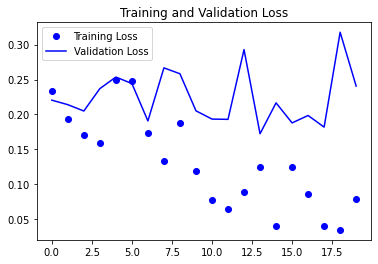

In [46]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

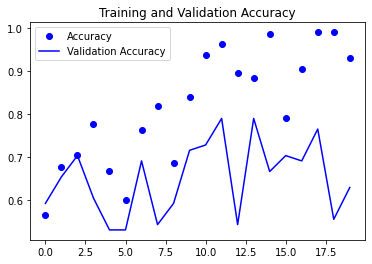

In [47]:
plt.figure()
plt.plot(epochs, acc, 'bo', label='Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [48]:
prediction = model.predict(X_test)

In [49]:
prediction.shape

(81, 1)

In [50]:
label_dict = {
    0: 'Cat',
    1: 'Dog'
}

Test Images


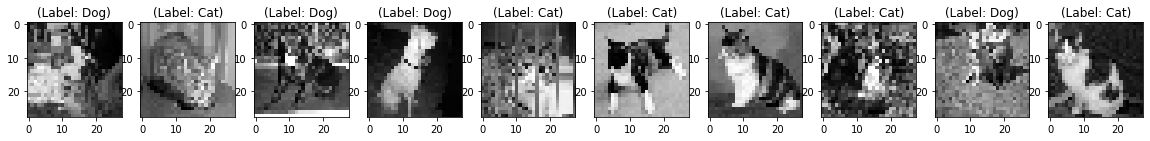

In [51]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i, ..., 0], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    